In [25]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.0 MB/s eta 0:00:00


## Customer Segmentation


Methodology: CRISP-DM process

1. Problem and objectives understanding
2. Data understanding
3. Data preprocessing
4. Modeling
5. Evaluation
6. Deployment (separate file)



In [26]:
# Data manipulation and visualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import itertools

# Preprocessing and decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture

# Metrics for evaluation
from sklearn.metrics import silhouette_samples, silhouette_score, classification_report
from sklearn import metrics

# Model training and evaluation
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

# To access dataset mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis
The sample Dataset summarizes the usage behavior of under 9000 active credit card holdersfor a 6 months period.
The file is at a customer level with 18 behavioral variables.
### Data Description

The dataset provides a summary of the usage behavior of nearly 9,000 active credit card holders over a 6-month period. Each record represents an individual customer and includes 18 variables that describe their credit card usage patterns.


**Features and Their Meanings:**
1. cust_id: This is the unique identification number for each credit card holder. It's used to identify individual customers. (Categorical)

2. balance: The remaining amount in the customer’s account that can be used for purchases.

3. balance_frequency: This indicates how often the balance is updated. It’s a score between 0 and 1, where 1 means the balance is updated frequently, and 0 means it is rarely updated.

4. purchases: The total amount of money spent by the customer using the credit card.

5. oneoff_purchases: The largest single purchase amount made by the customer in one transaction.

6. installments_purchases: The total amount of purchases made by the customer through installments.

7. cash_advance: The amount of cash the customer has withdrawn using the credit card.

8. purchases_frequency: This shows how often the customer makes purchases. It’s a score between 0 and 1, where 1 means purchases are made frequently, and 0 means they are rare.

9. oneoff_purchases_frequency: This shows how often the customer makes single, large purchases. Again, the score is between 0 (not often) and 1 (very often).

10. purchases_installments_frequency: This indicates how often the customer makes purchases in installments. The score is between 0 (rarely) and 1 (frequently).

11. cash_advance_frequency: This shows how often the customer withdraws cash using the credit card. The score is between 0 and 1.

12. cash_advance_trx: The total number of times the customer has made cash withdrawals using the credit card.

13. purchases_trx: The total number of purchases the customer has made using the credit card.

14. credit_limit: The maximum amount of credit available to the customer on their credit card.

15. payments: The total amount of money the customer has paid back towards their credit card balance.

16. minimum_payments: The minimum amount the customer is required to pay back on their credit card.

17. prc_full_payment: The percentage of the customer’s payments that were full payments (paying off the entire balance).

18. tenure: The number of months the customer has been using the credit card.

In [2]:
# Load customer data from the csv file
file_path = '/content/drive/My Drive/customer_segmentation/customer_data.csv'
df = pd.read_csv(file_path)
df.head(10)

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [3]:
# Get the dataset size
df.shape

(8950, 18)

The dataset contains 8950 entries and 18 columns.

In [4]:
# Get the data type, variable names and info about missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

**Data Quality and Type Observations**

1. The columns related to transactions and financial variables are of appropriate data types:
    - Float64 for continuous numerical data such as BALANCE, PURCHASES, etc.
    - Int64 for discrete numerical data such as CASH_ADVANCE_TRX, PURCHASES_TRX, etc.
2. The MINIMUM_PAYMENTS variable has over 200 missing data points (8637 non-null out of 8950 entries).
3. Other columns have consistent data types with the expected types for their respective data:
    - CUST_ID is an object (string) type, appropriate for unique customer identifiers.
4. The dataset appears to have consistent data types across all columns, indicating good data quality.

In [5]:
# Verify the number of missing datapoints per each variable
df.isna().sum()

,0
cust_id,0
balance,0
balance_frequency,0
purchases,0
oneoff_purchases,0
installments_purchases,0
cash_advance,0
purchases_frequency,0
oneoff_purchases_frequency,0
purchases_installments_frequency,0


MINIMUM_PAYMENTS has 313 missing datapoints

In [6]:
# Display several records for customers with  MINIMUM_PAYMENTS being missing
df[df['minimum_payments'].isnull()].tail()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.0,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.0,6


In [7]:
# identify and count the number of duplicate rows in the DataFrame
df.duplicated().sum()

0

In [8]:
# Ensure customers (cust_id) are not duplciated
df['cust_id'].duplicated().sum()

0

### Data Cleaning

Remove the 313 entries with missing datapoints for minimum_payment and one entry with missing data for credit_limit.

In [9]:
# Remove records with missing values
df.dropna(inplace=True)

In [10]:
# Remove the customer_id column as it will not be used in the training dataset
df.drop(columns=['cust_id'], axis=1, inplace=True)

In [11]:
df.columns

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure'],
      dtype='object')

### Visualising data distribution

In [ ]:
# Get a quick overview of the statistical properties of the numerical features.
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


* Balance:

> The average balance across all customers is approximately 1601 The balance values have a high standard deviation (STD) of approxiamtely $2095, indiciating that there is a significant variability in the balance helds held by different customers. The minimum balance is 0, meaning that some customers have no balance (possibly no debt owed).

 > 25% of the customers (25th Percentile) have a balance less than approximately $148, indicating that a significant portion of customers have relatively low balances.

 > The median balance is approximately $918, which suggests that half of the customers have a balance below this value. This medidan is lower than the mean, indicating that the distribution might be right-skewed (a few customers have very high balances).

 > 75% of the customers have a balance less than approximately $2105

 > The maximum balance is $19043, which is significantly higher than the mean and median, further suggesting the presence of some customers with very high balances.

 * Balance Frequency:

 > The average balance frequency score is approximately 0.895, which suggests that, on average, customers' balances are updated frequently. The standard deviation is relatively low at 0.208, meaning that most customers have balance frequency scores close to the mean.

  > The minimum value is 0, indicating that there are some customers whose balances are never updated. However, 25% of customers have a balance frequency score of around 0.909, which is already quite high. 75% of customers have a balance frequency of 1.0, further indicating that the majority of customers have their balances updated very regularly.

 * Purchases
  > The average amount spent on purchases is approximately $1024
  
  > The standard deviation is very high at $2167, indicating significant variability in the amount customers spend.


 > The minimum value is 0, meaning some customers made no purchases during the observed period.

 > 25% of the customers spent less than approximately $43, which suggests that a sizable portion of customers are either very low spenders or inactive.

 > The median purchase amount is approximately $375, which is significantly lower than the mean, indicating a right-skewed distribution where a few customers spend much more than the average.

 > 75% of the customers spent less than approximately $1145, which suggests that most customers spend moderately.

 > The maximum purchase amount is a striking $49,039, which is exceptionally high and indicates that a small number of customers make very large purchases.

 * Overall observations
 > Skewed Distribution Both balance and purchases have right-skewed distributions,  suggesting  there are outliers with significantly higher values.
 > High Variability in Spending (due to the high standard deviation for purchases). This could suggest potential segmentation e.g.
  * Low spenders with low balances.
  * High spenders with high balances.
  * High spenders with low balances (possibly indicating quick repayment).
  * Low spenders with high balances (potentially risky customers).

Text(0.5, 1.0, 'Correlation Matrix')

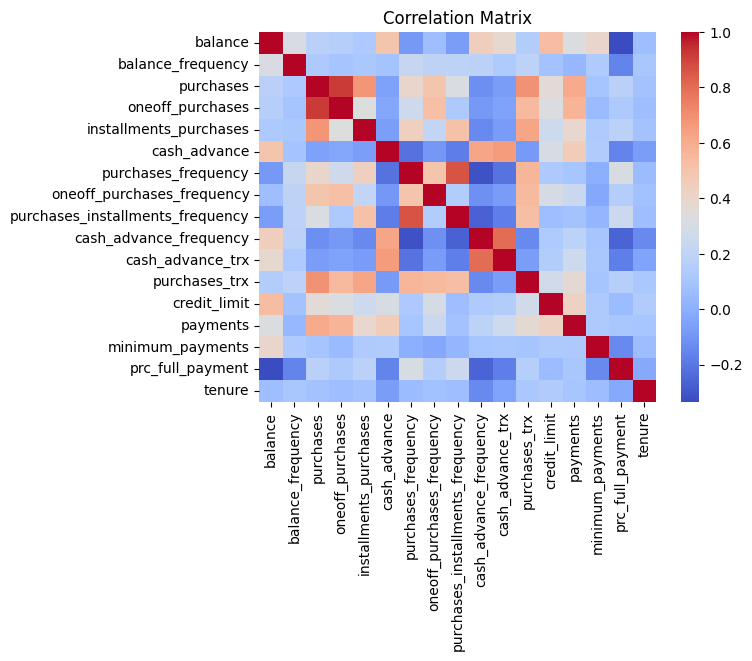

In [ ]:
# Heatmap correlation matrix
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')

###  
Visualize the relationships between the highly correlated features identified in the heatmap.

In [ ]:
# visualize the relationships between the highly correlated features identified in the heatmap.
corr_matrix = df.corr().abs()

# Since correlation between Feat.A and B is the same as between Feat.B & A I'll select
#the upper triangle of correlation matrix
# Use np.triu(matrix, k=1) to return upper traingle as mask
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than or equal to 0.6
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.7)]
high_corr_features

['oneoff_purchases', 'purchases_installments_frequency', 'cash_advance_trx']

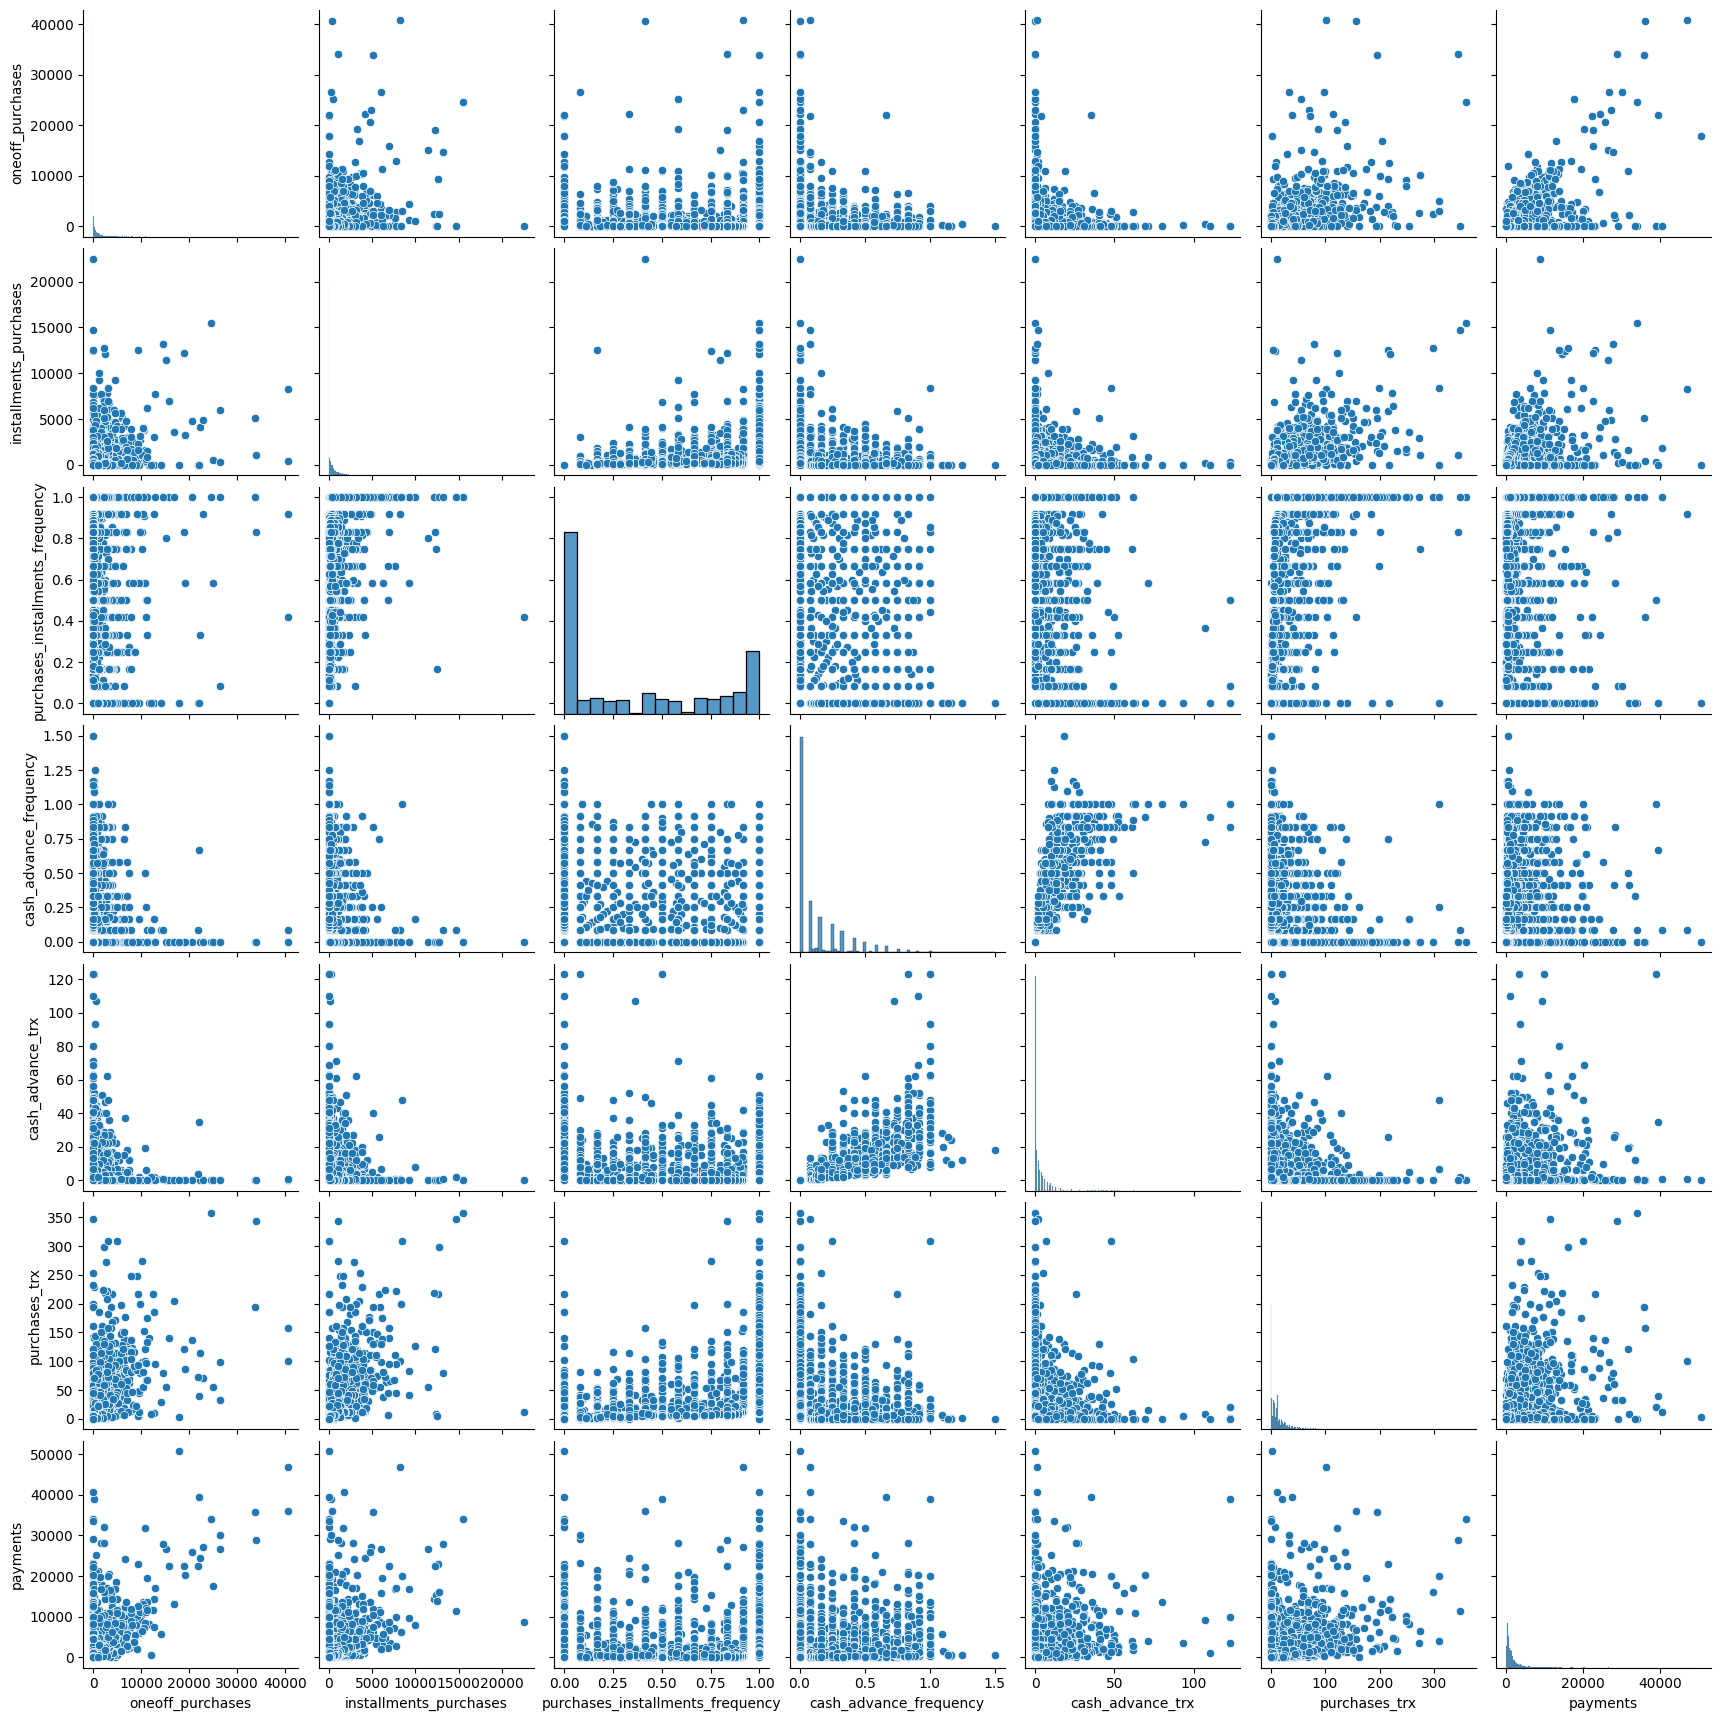

In [ ]:
# Plot the data dependencies for paris of features that have correlation greater or equal 0.6
sns.pairplot(df[high_corr_features])
plt.show()

The strongest visible correlations seem to be between payments and other spending-related features like oneoff_purchases, installments_purchases, and purchases_trx.


Additionally, there is a noticeable correlation between cash_advance_trx and cash_advance_frequency. his is expected since a higher frequency of cash advances would naturally correlate with a greater number of cash advance transactions.



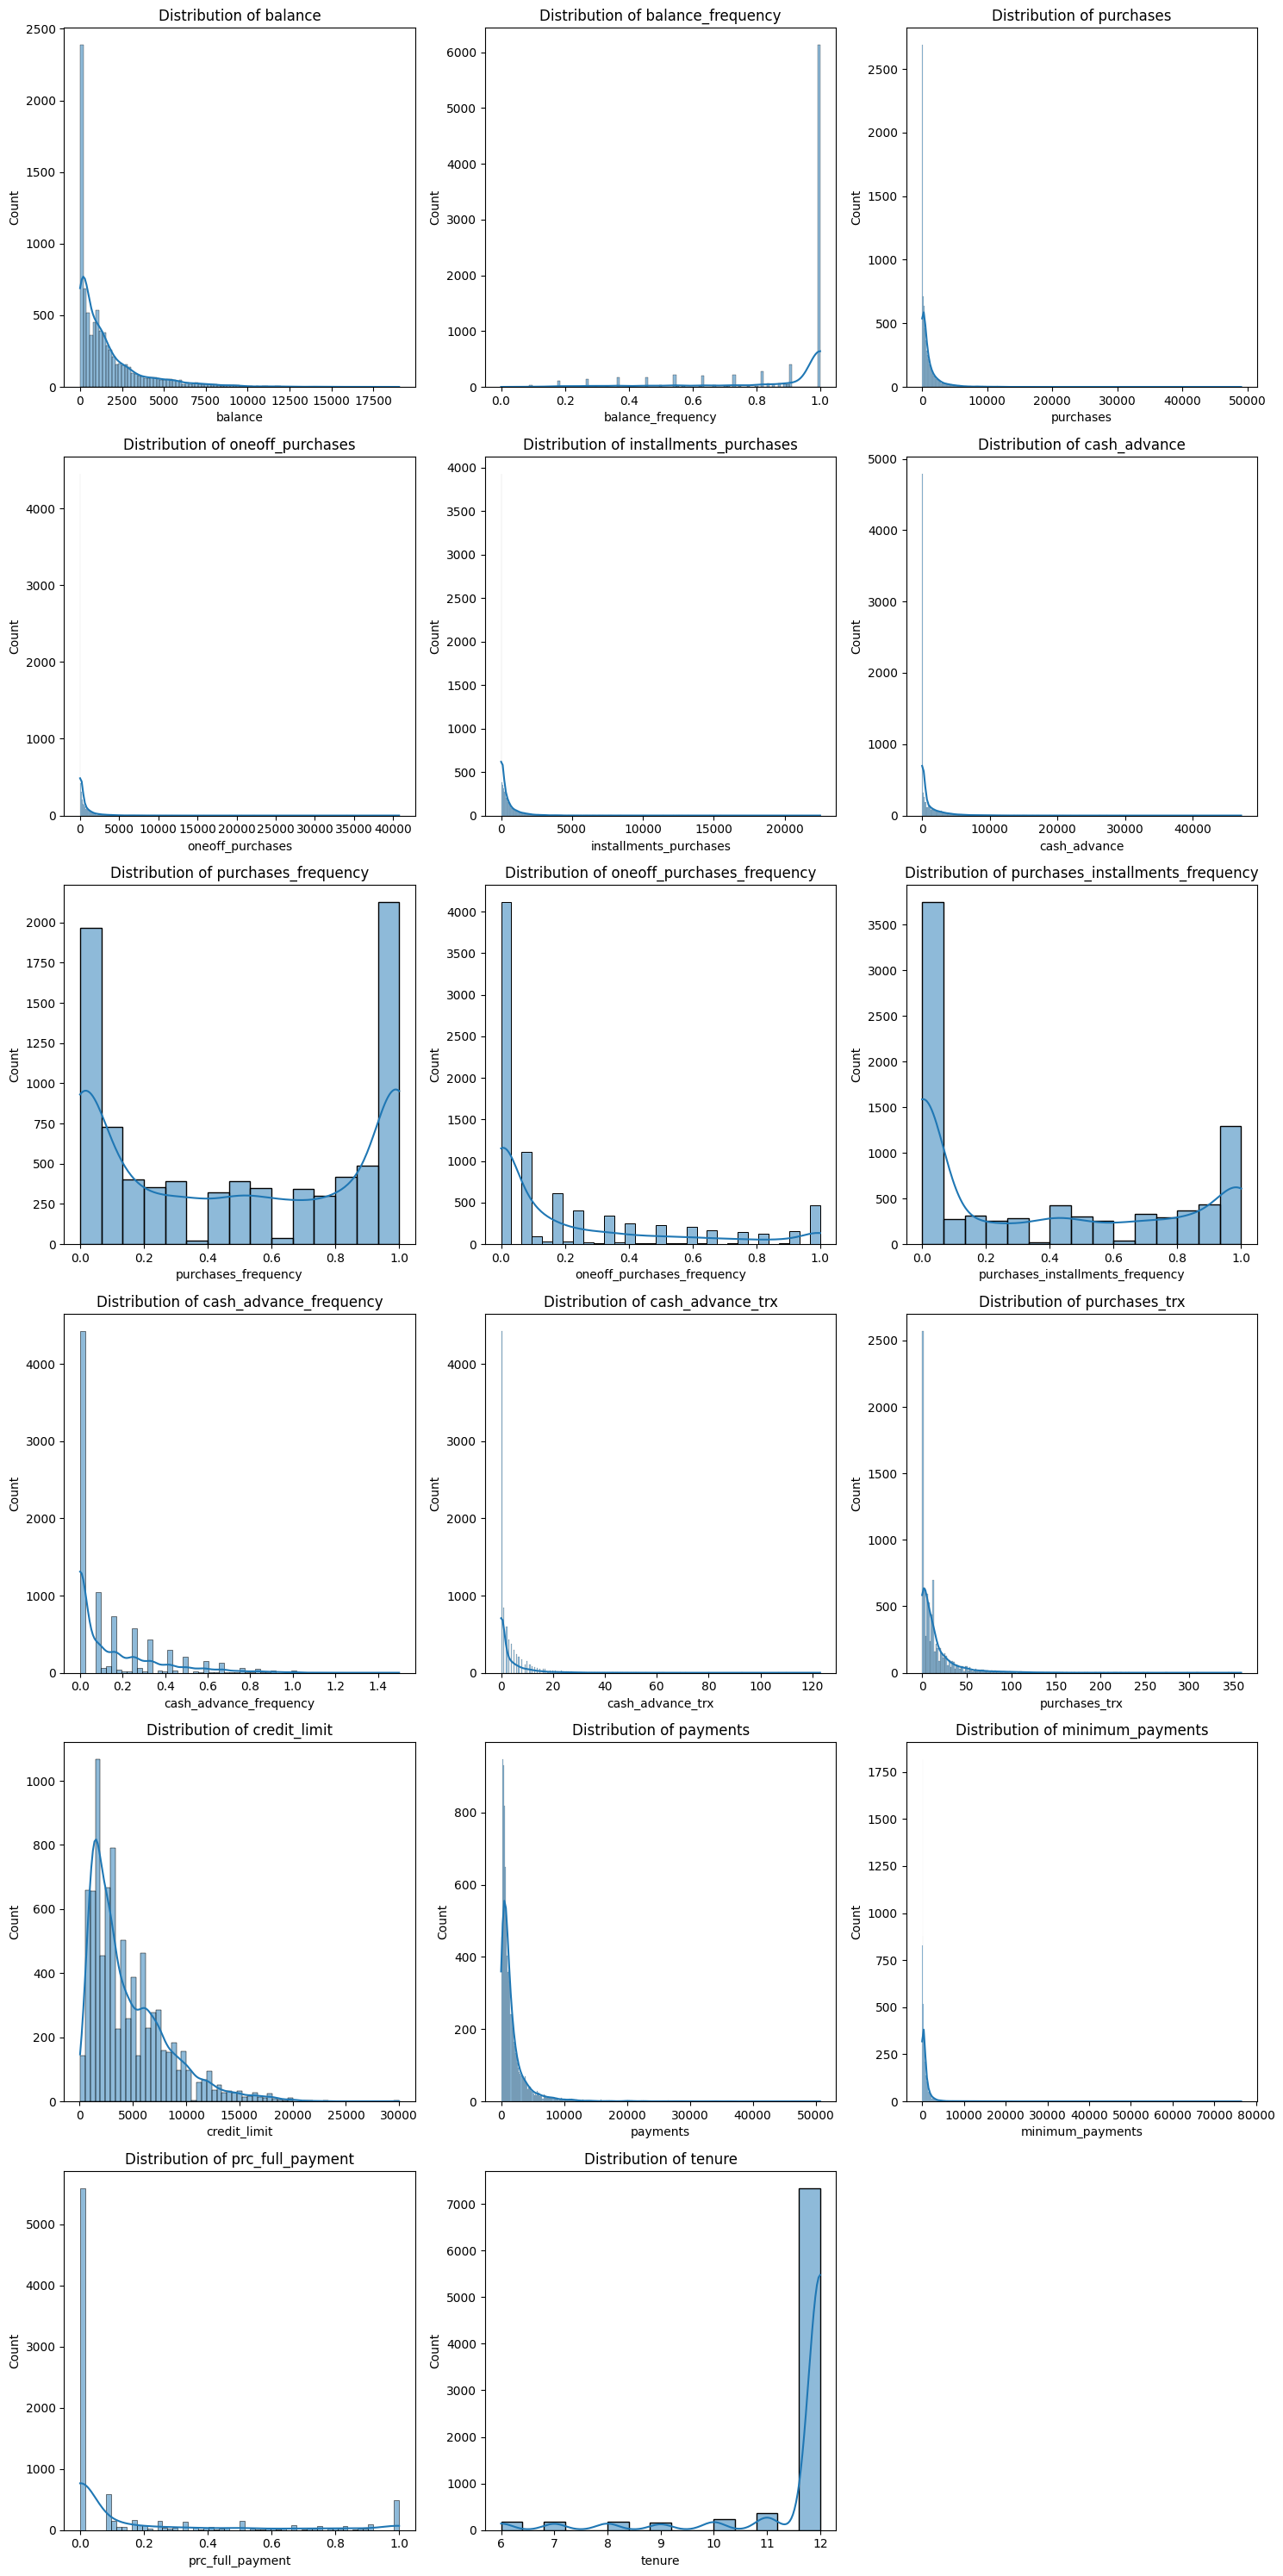

In [ ]:
# Determine the number of features
num_features = len(df.columns)

# Set up the grid for subplots
num_cols = 3  # Number of plots per row
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(df.columns):
    sns.histplot(data=df[col], kde=True, ax=axes[i])  # Histogram with KDE overlay
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()


Balance, Purchases, Installments Purchases, Cash Advance features have a significant concentration of data points near the lower values, with a long tail extending to the right.


Payments, Credit Limit, Minimum Payments also show a similar right-skewed pattern, where most customers have lower values, and a smaller number of customers have much higher values.

The distribution of purchase_frequency shows  a bimodal distribution, meaning there are two distinct peaks around 0 and 1 in the data. The first peak at purchases_frequency around 0 suggests that a large number of customers make very few or no purchases, wheras the second peak at purchases_frequency around 1 indicates a grouop of customers makes purchases very frequently. This may suggest potential two segmetns of Non-Active Users and Frequent Users.

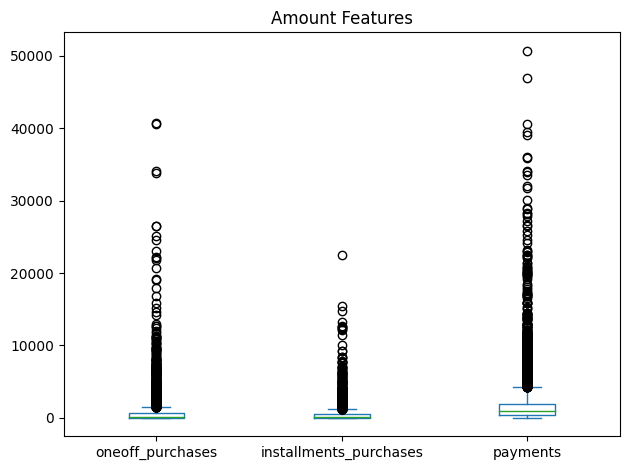

In [ ]:
# Checking outliers in the highly correlated features
df[['oneoff_purchases',
    'installments_purchases',
    'payments']].plot.box(title='Amount Features', legend=True)
plt.tight_layout()
plt.show()

The large number of outliers suggests that there are customers with unusually high amounts in these categories. These could be high-spending customers or cases where large payments or purchases were made.

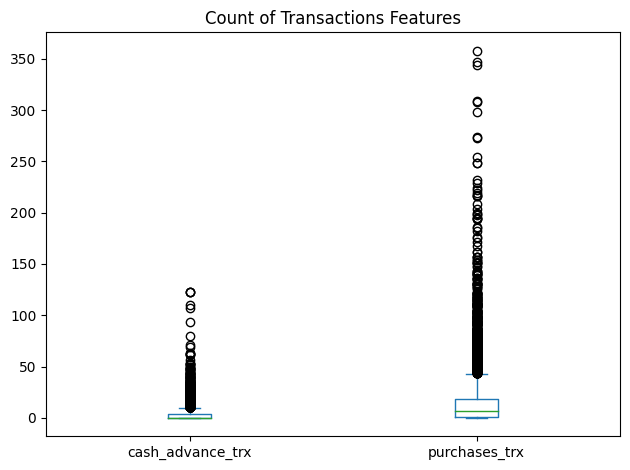

In [ ]:
df[['cash_advance_trx', 'purchases_trx']].plot.box(title='Count of Transactions Features', legend=True)
plt.tight_layout()
plt.show()

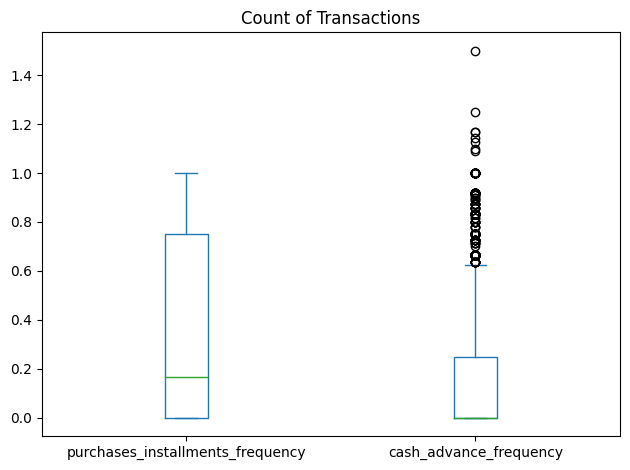

In [ ]:
df[['purchases_installments_frequency', 'cash_advance_frequency']].plot.box(title='Count of Transactions', legend=True)
plt.tight_layout()
plt.show()

Purchase installmetns frequency boxplot represents a typical range of values without outliers (as the whiskers extend from the box to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles, respectively). On the other hand, the cash_advance_frequency has dots beyond the whiskers which are considered outliers.

### Data Scaling

In [12]:
# Standardize the features (Mean = 0, Standard Deviation = 1)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

### Finding optimal number of clusters for K-Means

I'll use the Elbow Method to determine the optimal number of clusters for K-Means. By generating an inertia plot, we can visually identify the best k.

Smaller inertia means data points are closer to their cluster centroids, indicating more compact and similar clusters. However, very low inertia can signal overfitting, especially with too many clusters.

Elbow Method method helps find the point where adding more clusters no longer significantly reduces inertia. This "elbow" point is often the optimal number of clusters, balancing compactness with simplicity.

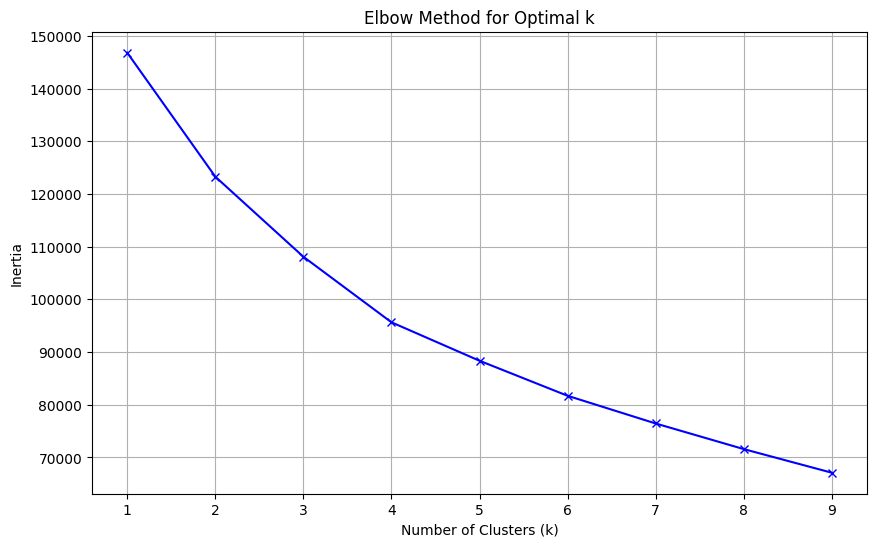

In [18]:
# Initialize a list to store inertia values (which are measures of cluster tightness)
inertia = []
range_val = range(1, 10)  # Range of k values to evaluate

# Calculate inertia for each value of k
for i in range_val:
    kmeans = KMeans(n_clusters=i, random_state=42)
    #kmeans.fit(pca_df)  # Fitting the model to the dimensionally reduced data
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)  # Append the inertia value for this k to the list


# Plot the results to visualize the Elbow
plt.figure(figsize=(10, 6))
plt.plot(range_val, inertia, 'bx-', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

the inertia decreases significantly as the number of clusters increases from 1 to 4.

After 4 clusters, the rate of decrease in inertia starts to slow down, forming a more gradual slope. This suggests that adding more clusters beyond 4 provides diminishing returns in terms of reducing inertia.


The "elbow" of the curve seems to be around 4 clusters, meaning that this is likely the optimal number of clusters.


### Running the K-Means Model



In [19]:
# Initialize the K-Means Model
kmeans_model = KMeans(n_clusters=4, random_state=42)
# Fit and predict the clusters to which the datapoint should belong to
#kmeans_labels = kmeans_model.fit_predict(pca_df)
kmeans_labels = kmeans_model.fit_predict(scaled_df)

# Adding cluster labels to the data
df_with_clusters = pd.concat([df, pd.DataFrame({'cluster': kmeans_labels})], axis=1)

In [20]:
# print few examples
df_with_clusters.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,3.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,1.0


 Silhouette analysis can be used to assess the quality of the clustering, showing if the clusters are well-defined and distinct from each other.

Average silhouette score: 0.1970448976486613 for K-Means


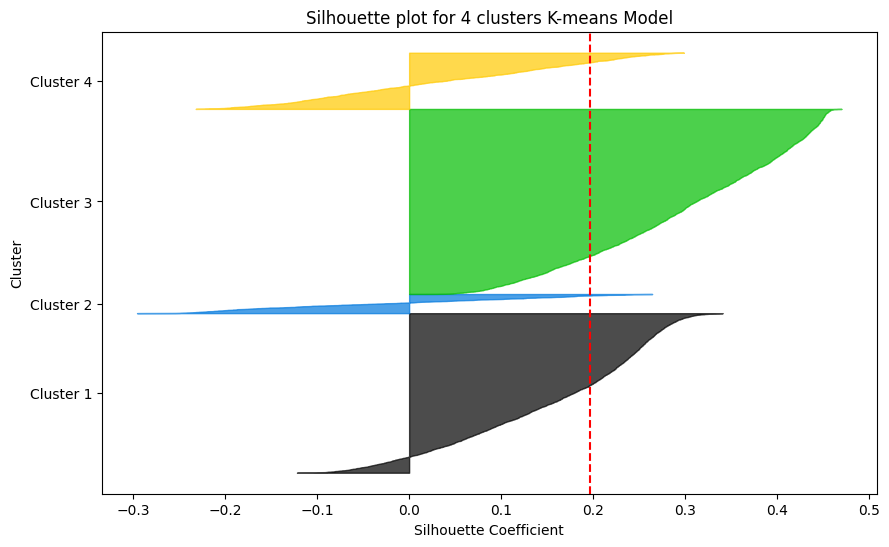

In [38]:
# Compute silhouette score for each sample
silhouette_vals = silhouette_samples(scaled_df, kmeans_model.labels_)

# Overall silhouette score
silhouette_avg = silhouette_score(scaled_df, kmeans_model.labels_)

print(f'Average silhouette score: {silhouette_avg} for K-Means')


# Number of clusters
n_clusters = len(np.unique(kmeans_model.labels_))

# Create a subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize y-axis position
y_lower, y_upper = 0, 0
yticks = []

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples in the cluster i and sort them
    cluster_silhouette_vals = silhouette_vals[kmeans_model.labels_ == i]
    cluster_silhouette_vals.sort()

    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / n_clusters)

    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)

    yticks.append((y_lower + y_upper) / 2)
    y_lower = y_upper

# Customize the plot
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks(yticks)
ax.set_yticklabels([f'Cluster {i+1}' for i in range(n_clusters)])
ax.set_ylabel("Cluster")
ax.set_xlabel("Silhouette Coefficient")

plt.title(f'Silhouette plot for {n_clusters} clusters K-means Model')
plt.show()

A score close to 0, like the Average silhouette score of 0.1970448976486613, suggests that the clusters may not be well defined. The points are either too close to the boundary between clusters or incorrectly clustered.

Many features have outliers, which may have affected the K-Means clustering. I will use K-Medoids, as it is more robust to outliers.


**Chart Description**

The silhouette coefficient values range from -0.3 to 0.5.
Positive values (closer to +1) indicate that data points are well-clustered, meaning they are closer to their own cluster and far from others.
Negative values (below 0) suggest that data points might be assigned to the wrong cluster.


The chart suggests that clustering is somewhat weak, with only Cluster 3 showing strong internal cohesion. The presence of clusters with negative silhouette scores and a low average score suggests that the data might not be well-suited for the current clustering configuration, possibly due to outliers or overlapping clusters.

### Running the K-Medoids Model

In [32]:
# Initialize the K-Medoids Model
kmedoids_model = KMedoids(n_clusters=4, random_state=42)

# Fit and predict the clusters to which the datapoints should belong
kmedoids_labels = kmedoids_model.fit_predict(scaled_df)

# Adding cluster labels to the original DataFrame
df_with_clusters = pd.concat([df, pd.DataFrame({'cluster': kmedoids_labels})], axis=1)


Average silhouette score: 0.1430101629718594 for K-Mmedoids


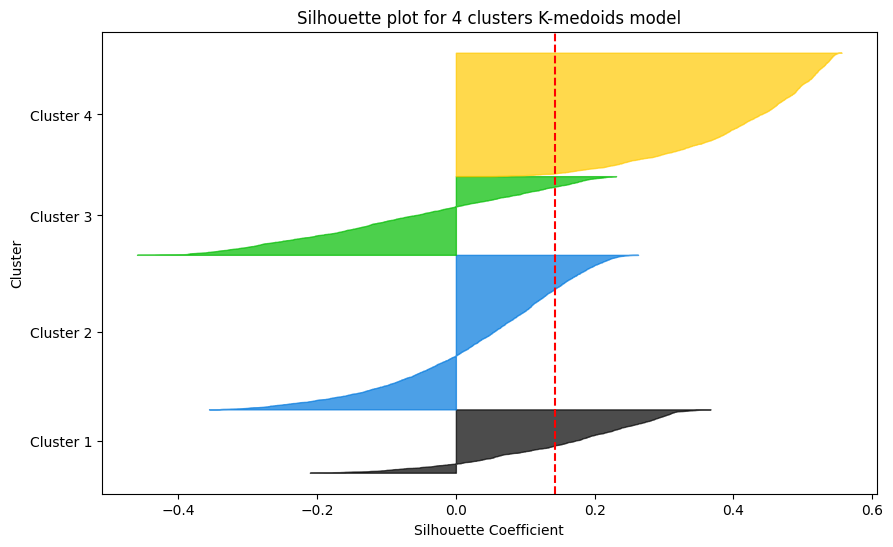

In [37]:
# Compute silhouette score for each sample
silhouette_vals = silhouette_samples(scaled_df, kmedoids_model.labels_)

# Overall silhouette score
silhouette_avg = silhouette_score(scaled_df, kmedoids_model.labels_)

print(f'Average silhouette score: {silhouette_avg} for K-Mmedoids')


# Number of clusters
n_clusters = len(np.unique(kmedoids_model.labels_))

# Create a subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Initialize y-axis position
y_lower, y_upper = 0, 0
yticks = []

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples in the cluster i and sort them
    cluster_silhouette_vals = silhouette_vals[kmedoids_model.labels_ == i]
    cluster_silhouette_vals.sort()

    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / n_clusters)

    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)

    yticks.append((y_lower + y_upper) / 2)
    y_lower = y_upper

# Customize the plot
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks(yticks)
ax.set_yticklabels([f'Cluster {i+1}' for i in range(n_clusters)])
ax.set_ylabel("Cluster")
ax.set_xlabel("Silhouette Coefficient")

plt.title(f'Silhouette plot for {n_clusters} clusters K-medoids model')
plt.show()

The silhouette plot from the K-Medoids clustering shows that the overall clustering performance has decreased compared to the K-Means model, as indicated by the lower average silhouette score of 0.14.


The silhouette coefficients now range from approximately -0.4 to 0.6.


There are more negative silhouette scores, which suggests that a larger number of data points may be misclassified or are poorly clustered.
Only Cluster 4 (yellow) shows a good separation with many data points having positive silhouette scores, though the range of scores is wide.

### Agglomerative Clustering Model

In [34]:
# Initialize and fit the Agglomerative Clustering model
agg_model = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_model.fit_predict(scaled_df)

# Calculate the average silhouette score
agg_silhouette_avg = silhouette_score(scaled_df, agg_labels)
print(f'Average silhouette score for Agglomerative Clustering: {agg_silhouette_avg}')

Average silhouette score for Agglomerative Clustering: 0.1626116943237927


###DBSCAN Model

In [35]:
# Initialize and fit the DBSCAN model
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(scaled_df)

# Calculate the average silhouette score (excluding noise points with label -1)
dbscan_silhouette_avg = silhouette_score(scaled_df, dbscan_labels)
print(f'Average silhouette score for DBSCAN: {dbscan_silhouette_avg}')

Average silhouette score for DBSCAN: -0.465117752115066


### Spectral Clustering Model

In [36]:
# Initialize and fit the Spectral Clustering model
spectral_model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral_model.fit_predict(scaled_df)

# Calculate the average silhouette score
spectral_silhouette_avg = silhouette_score(scaled_df, spectral_labels)
print(f'Average silhouette score for Spectral Clustering: {spectral_silhouette_avg}')

Average silhouette score for Spectral Clustering: 0.0024587312888116526


### Models evaluation

Based on the average silhouette scores for each clustering model, K-Means emerged as the most suitable option with a score of 0.197, indicating relatively better cluster separation compared to the other methods. Agglomerative Clustering followed with a score of 0.163, showing moderate performance, while K-Medoids had a slightly lower score of 0.143, suggesting that its robustness to outliers didn’t significantly improve clustering quality in this case. Spectral Clustering, with an almost neutral silhouette score of 0.002, struggled to find distinct clusters, and DBSCAN performed the worst with a negative silhouette score of -0.465, indicating substantial misclassification and poor clustering results.


Although K-Means is the best-performing model, it is still suboptimal, indicating that further improvements are necessary. On the other hand, DBSCAN appears to be the least suitable model for this dataset.

## Visualizing Clusters for the Best-Performing Model (K-Means)

To visualize the clusters, I'll reduce the dataset to 3D space. This is achieved using Principal Component Analysis (PCA), a technique that reduces dimensionality by transforming the original features into a new set of uncorrelated features called principal components.

In [ ]:
# Initilize a PCA object that will reduce the dataset to 4 principal components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["pca1","pca2", "pca3"])
pca_df.head()

,pca1,pca2,pca3
0,-1.696395,-1.122585,0.491543
1,-1.215679,2.435629,0.694791
2,0.935853,-0.385202,-0.025957
3,-1.614638,-0.724587,0.272330
4,0.223701,-0.783612,-1.184412


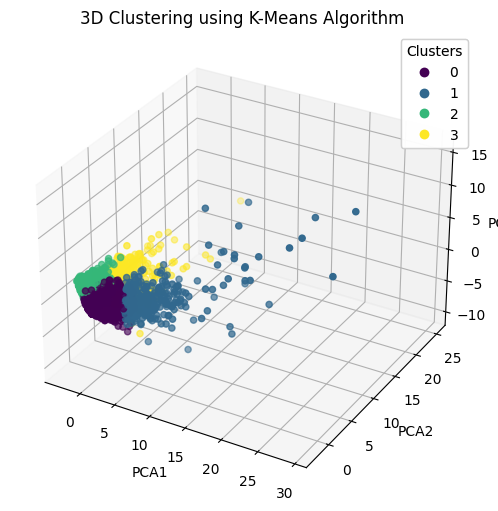

<Figure size 640x480 with 0 Axes>

In [ ]:
# Combine PCA results with the cluster labels
pca_kmeans_df = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)

# Create a 3D figure
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    pca_kmeans_df["pca1"],
    pca_kmeans_df["pca2"],
    pca_kmeans_df["pca3"],
    c=pca_kmeans_df["cluster"],
    cmap='viridis',
    s=20  # Size of the points
)

# Adding labels and title
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title("3D Clustering using K-Means Algorithm")

# Legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

# Show plot
plt.show()
# Adjust layout to prevent cutting off labels
plt.tight_layout()


In [39]:
# List of columns to consider for plotting
columns_of_interest = [
    'purchases_trx',
    'balance',
    'prc_full_payment',
    'installments_purchases',
    'cash_advance_frequency',
    'credit_limit',
    'balance_frequency',
    'minimum_payments',
    'cash_advance',
    'payments',
    'purchases',
    'purchases_frequency'
]

# Generate combinations of three columns at a time
combinations = list(itertools.combinations(columns_of_interest, 3))

# Loop to plot only 16 combinations
for i, (col1, col2, col3) in enumerate(combinations):
    if i >= 16:  # Stop after 40 plots
        break

    # Create 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    scatter = ax.scatter(df_with_clusters[col1], df_with_clusters[col2], df_with_clusters[col3],
                         c=df_with_clusters["cluster"], s=20)

    # Set labels
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_zlabel(col3)

    # Add a title
    ax.set_title(f'3D Scatter Plot of {col1}, {col2}, {col3}')

    # Legend
    legend = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend)

    # Show plot
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

The 3D charts, based on three features with color-coded clusters, do not show clear separation. The results are not compelling, making it challenging to discern any distinct clustering differentiation visually.

### Further analysis of the clusters

To gain a deeper understanding of whether and how clusters contribute to customer segmentation, visualizing the distribution of features within each cluster (such as through boxplots or histograms) can reveal more detailed differences among customer segments.

Finally, cluster profiling, which involves a thorough analysis of the means, medians, and distributions of features within each cluster, enhances the understanding of customer segmentation by creating detailed profiles of each group. group.

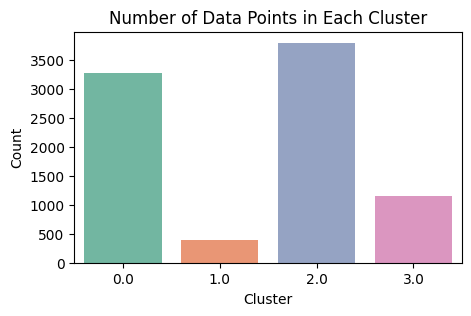

In [ ]:
# Bar plot showing the number of data points in each cluster
plt.figure(figsize=(5,3))
sns.countplot(x='cluster', data=df_with_clusters, palette='Set2')
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

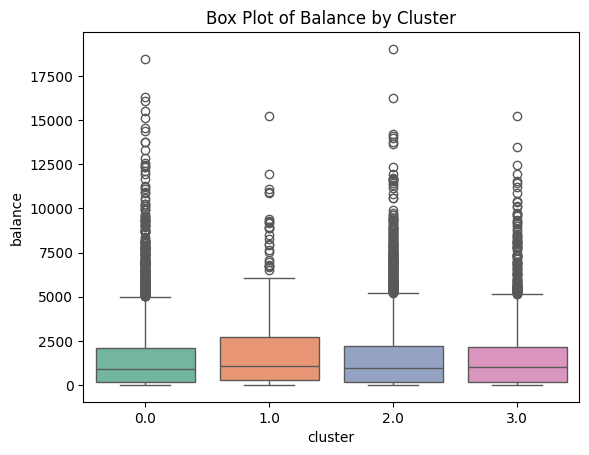

In [ ]:
# Plot boxplots for 'balance' feature by each cluster
sns.boxplot(x='cluster', y='balance', data=df_with_clusters, palette='Set2')

# Adjust title with additional parameters
plt.title('Box Plot of Balance by Cluster')
plt.show()


Based on the box plot, it does seem that the clusters do not show a clear separation in terms of the balance feature and we can infer similar distributions across clusters (medians and interquartile ranges (IQRs) for the balance feature across the clusters are quite similar, so this indicates that the clustering algorithm did not create groups with distinct balance characteristics).


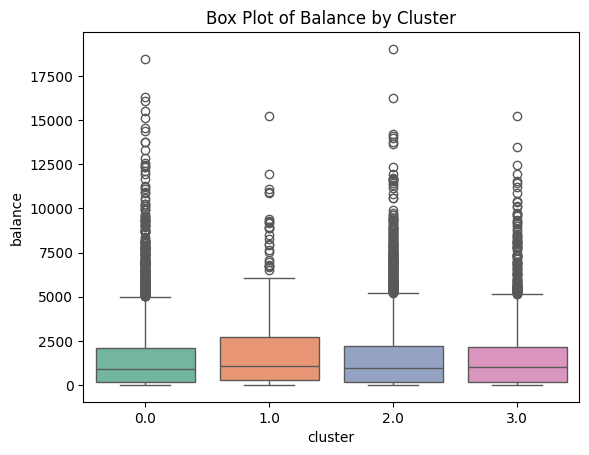

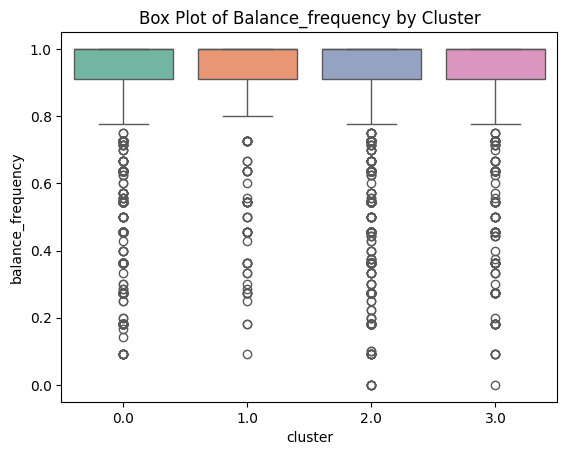

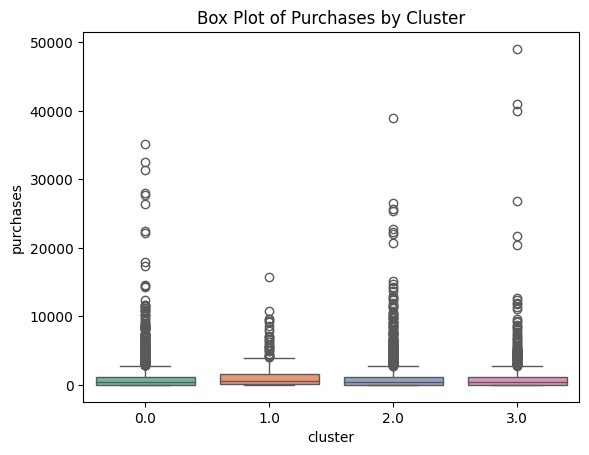

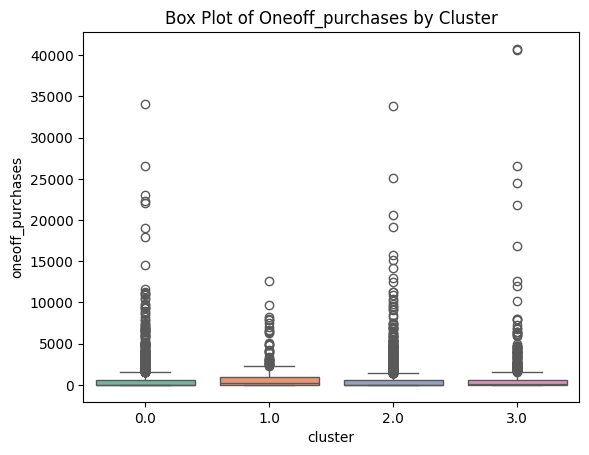

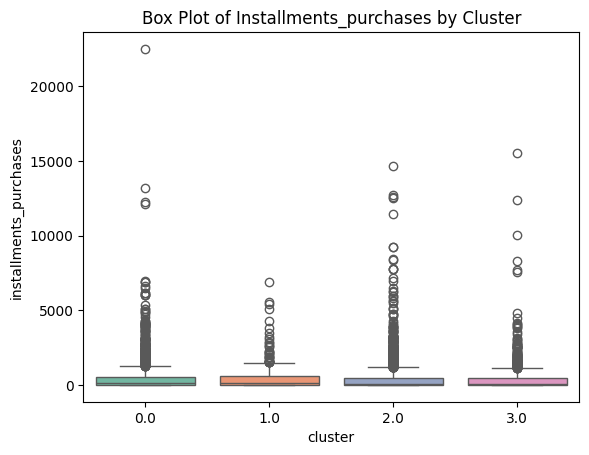

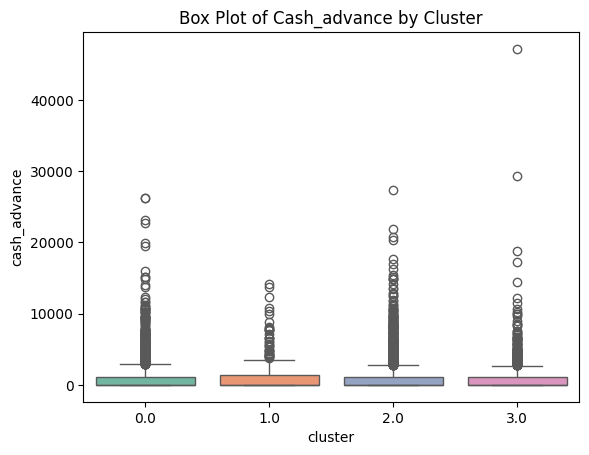

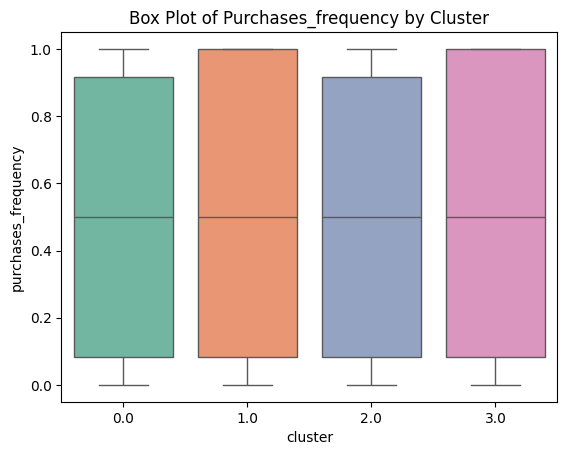

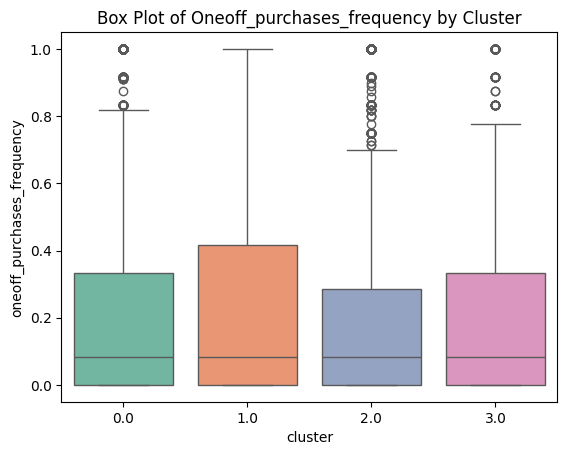

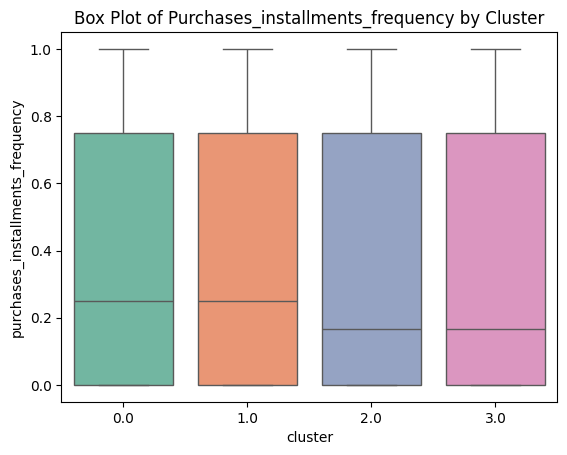

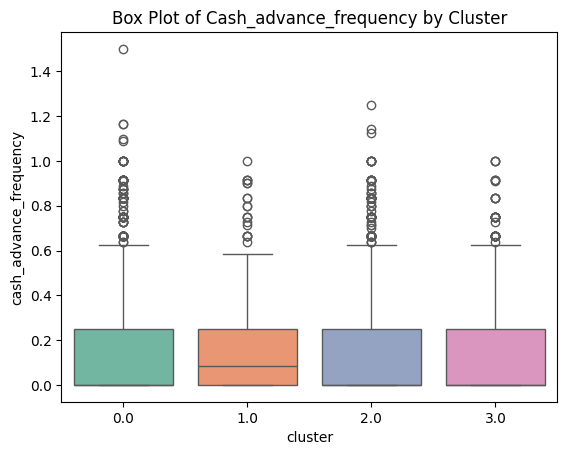

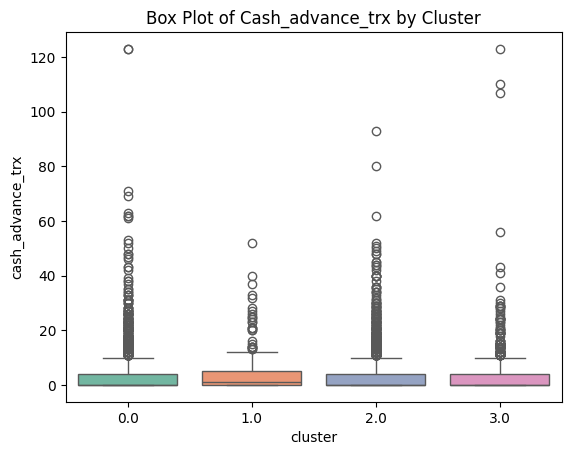

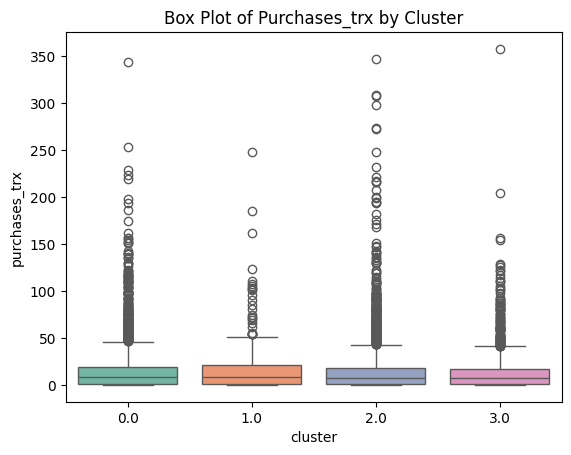

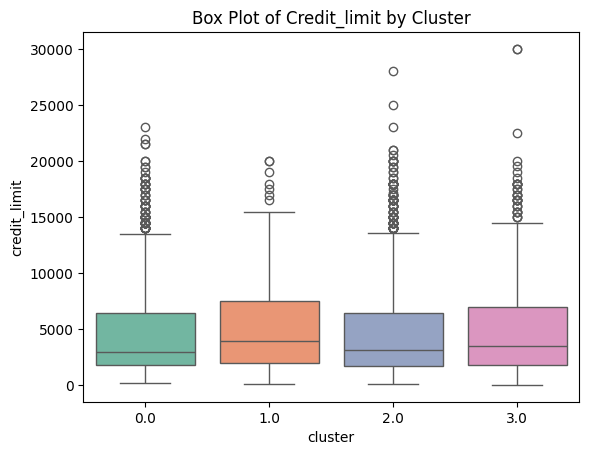

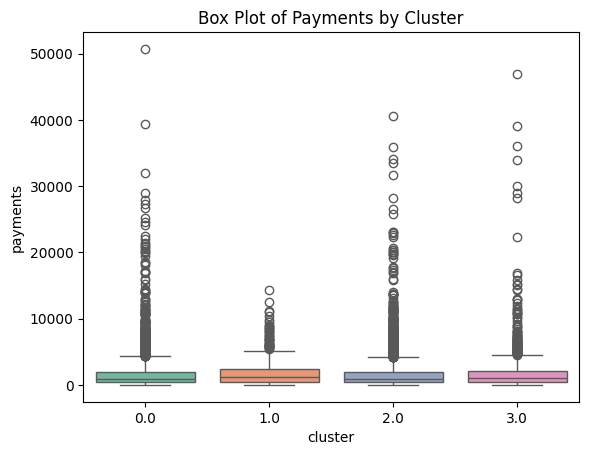

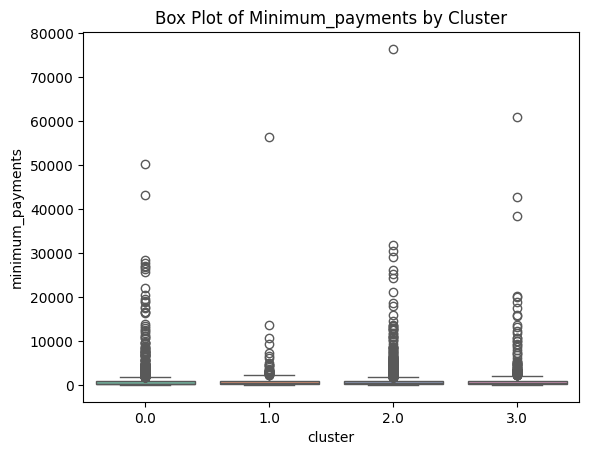

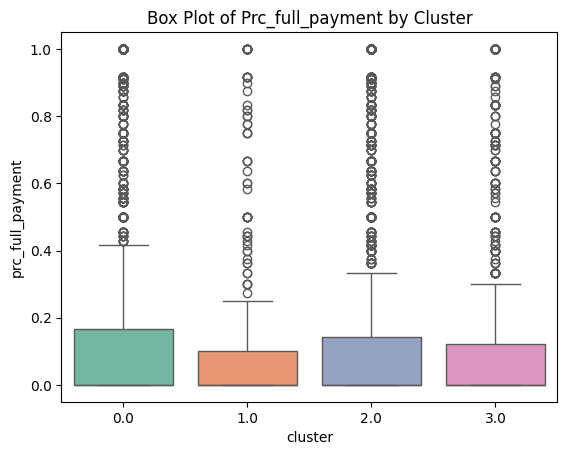

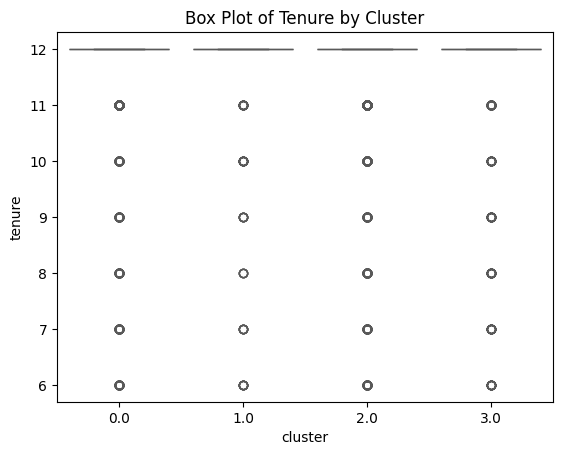

In [ ]:
# Plot boxplots for 'balance' feature by each cluster
for col in df.columns:
  sns.boxplot(x='cluster', y=col, data=df_with_clusters, palette='Set2')
  plt.title(f'Box Plot of {col.capitalize()} by Cluster')
  plt.show()

The boxplots showing the data distribution of a feature across each cluster reveal that there is no distinct separation between the clusters. Most of the clusters exhibit a similar data distribution pattern, including similar means and interquartile ranges, indicating a lack of differentiation among the clusters.

### Getting and Displaying Cluster Centroids

The centroids represent the "average" position of data points within each cluster across all features. By calculating and displaying these centroids, I can identify the central tendency of each feature within a cluster.
This can help to understand the general profile or the "typical" customer in each cluster. So, the centroid values provide a snapshot of the key characteristics that define each cluster, which can be crucial for segmenting customers or tailoring strategies to different groups.

### Predicting clusters with Decision Trees

Training a decision tree to predict cluster membership helps identify the most influential features that distinguish one segment from another, helping to obtain interpretable model of the segmentation process.

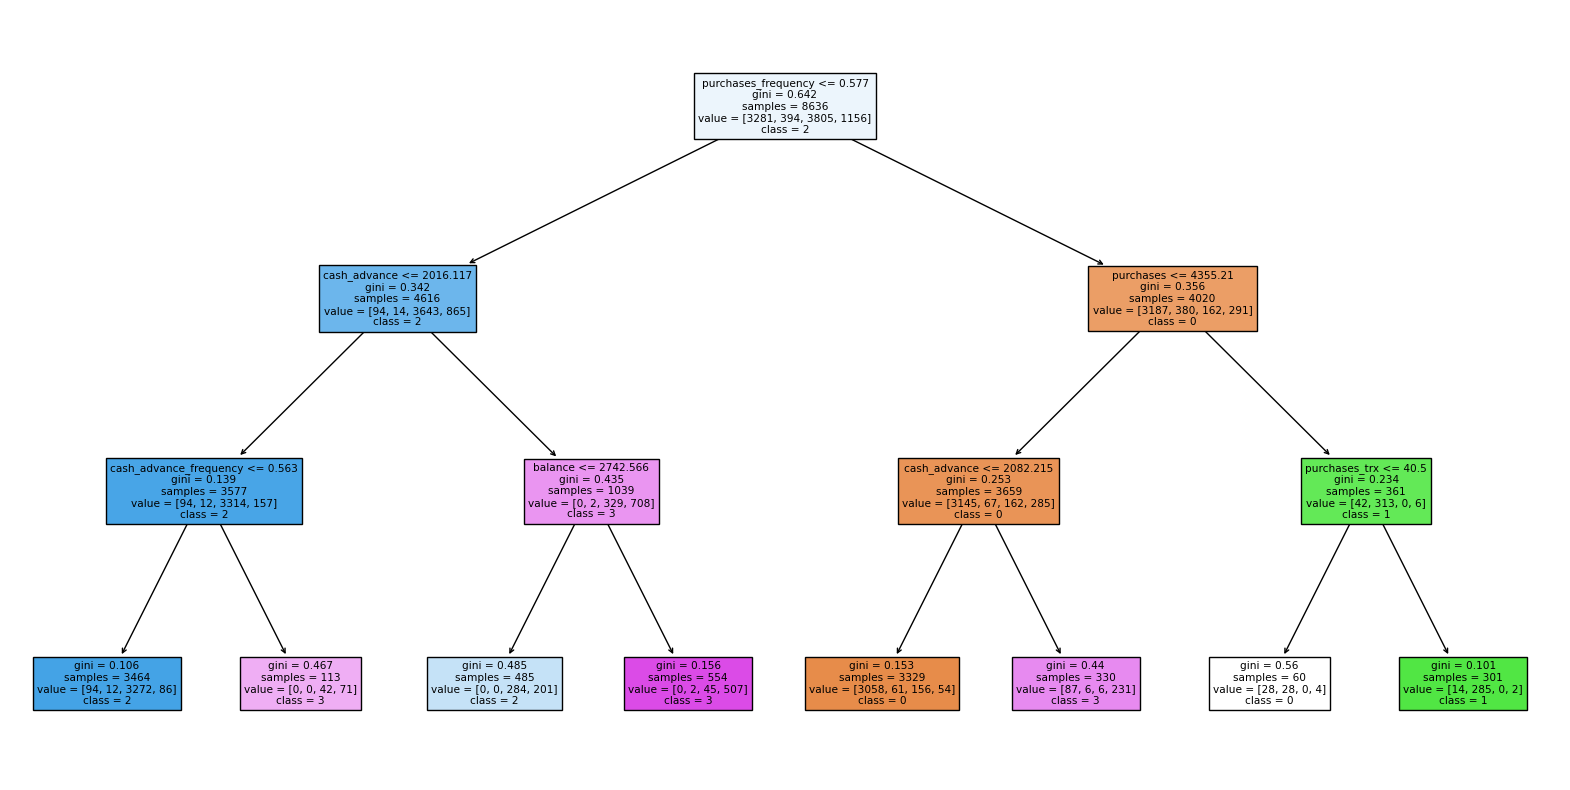

In [ ]:
# Train a decision tree to predict clusters
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(df, kmeans_model.labels_)

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=df.columns, class_names=[str(i) for i in range(4)], filled=True)
plt.show()


In [50]:
# Get the cluster centers
centroids = kmeans_model.cluster_centers_

# Convert to a DataFrame for easier interpretation
centroids_df = pd.DataFrame(centroids, columns=df.columns)

# Display the centroids for each cluster
centroids_df

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.328390,0.246211,0.110403,0.003664,0.254081,-0.365697,0.975464,0.321823,0.866357,-0.464798,-0.361396,0.297001,-0.073248,-0.141354,-0.090619,0.388284,0.050839
1,0.947254,0.442042,3.133683,2.725110,2.401013,-0.158365,1.117981,1.771238,1.050446,-0.330919,-0.175769,2.991161,1.435706,1.948544,0.485509,0.447380,0.316458
2,-0.257692,-0.366586,-0.346791,-0.233913,-0.389846,-0.182675,-0.801277,-0.393901,-0.717708,-0.091398,-0.159558,-0.477991,-0.345155,-0.264948,-0.122433,-0.253997,-0.042173
3,1.457394,0.357161,-0.239934,-0.169270,-0.256292,1.693188,-0.512217,-0.220568,-0.454598,1.732832,1.610823,-0.289121,0.854647,0.609153,0.494713,-0.418484,-0.113340


The cluster centroids represent the "center" of each cluster in terms of the average values of the features.
Since the data has been standardized, the centroid values represent the average position of the cluster in the context of the standardized features, where the mean of each feature is 0 and the standard deviation is 1.
The sign (positive or negative) of a centroid value indicates whether the feature's average value in that cluster is above or below the dataset's overall average, respectively. The magnitude indicates how strongly this feature differentiates the cluster from others. Positive values suggest that the cluster is characterized by higher-than-average values for that feature, while negative values suggest lower-than-average values.

For example, the centroid for **cluster 0** reveals negative values for most features indicate that the data points in this cluster generally have lower-than-average values for features like **balance, purchases, cash_advance**, and **payments**.
High purchases_frequency and purchases_installments_frequency indicate that although the total amount spent on purchases is low, customers in this cluster tend to make frequent and smaller purchases, possibly using installment plans.
Positive prc_full_payment suggests that customers in this cluster are more likely to pay off their balances in full compared to other clusters.

On the other hand, the Cluster 1 has significantly positive values for balance, purchases, oneoff_purchases, installments_purchases, purchases_frequency, credit_limit, payments, and minimum_payments suggest that this cluster consists of high-value customers who maintain high balances, spend more, and have higher credit limits.
High oneoff_purchases_frequency and purchases_installments_frequency indicate that these customers engage frequently in both one-time large purchases and installment purchases.
Moderately positive prc_full_payment suggests a tendency toward paying off balances but not as strongly as Cluster 0.



### Cluster profiling

Cluster profiling involves a more detailed examination of each cluster by analyzing various statistical measures (like mean, median, standard deviation, etc.) for each feature within the cluster.

In [40]:
# Descriptive statistics for each cluster
cluster_profile = df_with_clusters.groupby('cluster').describe()
cluster_profile

balance                                                              \
          count         mean          std       min         25%         50%   
cluster                                                                       
0.0      1253.0  1567.091615  2107.394522  0.000000  135.856693  896.563274   
1.0      3070.0  1644.086095  2167.589100  0.000199  158.187906  929.905494   
2.0      1562.0  1708.197488  2178.005866  0.000000  169.463092  993.819663   
3.0      2454.0  1628.421756  2013.203882  0.000000  173.411398  993.193087   

                                  balance_frequency            ...  \
                 75%          max             count      mean  ...   
cluster                                                        ...   
0.0      2063.855487  16259.44857            1253.0  0.888191  ...   
1.0      2117.429926  18495.55855            3070.0  0.893612  ...   
2.0      2220.955566  15258.22590            1562.0  0.902868  ...   
3.0      2287.304557  19043.13856            2454.0  0.904503  ...   

        prc_full_payment       tenure                                        \
                     75%  max   count       mean       std  min   25%   50%   
cluster                                                                       
0.0             0.125000  1.0  1253.0  11.563448  1.272782  6.0  12.0  12.0   
1.0             0.166667  1.0  3070.0  11.624104  1.182337  6.0  12.0  12.0   
2.0             0.142857  1.0  1562.0  11.619078  1.168767  6.0  12.0  12.0   
3.0             0.142857  1.0  2454.0  11.634067  1.148457  6.0  12.0  12.0   

                     
          75%   max  
cluster              
0.0      12.0  12.0  
1.0      12.0  12.0  
2.0      12.0  12.0  
3.0      12.0  12.0  

[4 rows x 136 columns]

Customers in Cluster 1 tend to have higher balances, higher credit limits, and engage in more frequent and higher-value transactions compared to other clusters. They also use cash advances slightly more often and make substantial payments, though they are less likely to pay off their balances in full each month. This cluster could represent high-value customers who manage significant financial activity but may also carry larger balances and utilize various credit products like cash advances and installment plans.

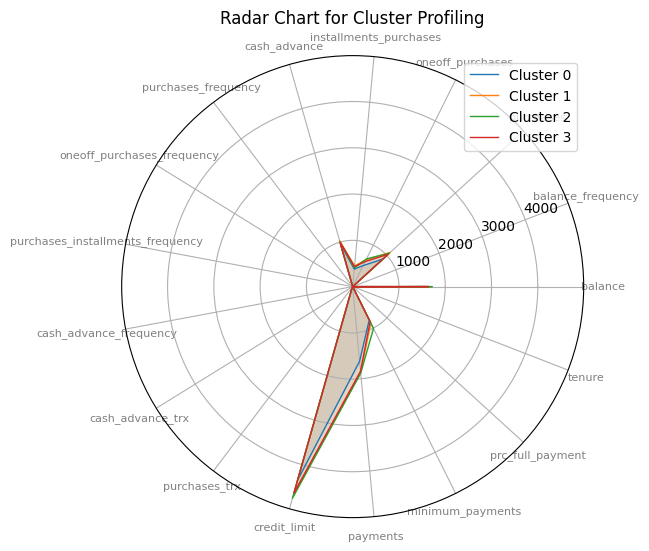

In [49]:
from math import pi

plt.figure(figsize=(6, 6))

# Compute the means of each feature for each cluster
cluster_means = df_with_clusters.groupby('cluster').mean()

# Number of variables we're plotting
categories = list(cluster_means.columns)
N = len(categories)

# Radar chart for each cluster
for i in range(cluster_means.shape[0]):
    values = cluster_means.iloc[i].tolist()
    values += values[:1]  # Close the loop for the radar chart

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

plt.title('Radar Chart for Cluster Profiling')
plt.legend()
plt.show()


The radar chart shows that most features have similar values across all clusters, as the lines representing each cluster overlap significantly.
This suggests that the clusters may not be well-differentiated based on these features, meaning the clusters are not distinct from each other in terms of these metrics.


There may be slight differences in features like balance and purchases, where the lines diverge a bit more. However, these differences are minimal, indicating that even these features do not strongly differentiate the clusters.
The closeness of the lines across most features suggests that all clusters share similar characteristics across these metrics.


Since the goal was to create distinct customer segments, this chart implies that further refinement of the clustering approach or feature selection may be necessary.
